In [ ]:
import pandas as pd
from google.colab import drive
import os

drive.mount('/content/drive')
Drive = "/content/drive/My Drive/data_analysis/competition/Signate_Blue"

Input = os.path.join(Drive, 'input')
Output = os.path.join(Drive, 'output')
Submission = os.path.join(Drive, "submission")

Mounted at /content/drive


In [ ]:
train = pd.read_csv(os.path.join(Input, 'train_data.csv'), index_col=0) # 学習用データ
test = pd.read_csv(os.path.join(Input, 'test_data.csv'), index_col=0) # 学習用データ
submit = pd.read_csv(os.path.join(Input, 'submit_example.csv') , header=None) # 応募用サンプルファイル

#特徴量エンジニアリング1

In [ ]:
data_type = train.dtypes
float_columns = list(data_type[(data_type != int) & (data_type != float)].index)
float_columns

['YMD', 'Landsat_StartTime', 'PRODUCT_ID', 'mesh20']

In [ ]:
train_land = train["Landsat_StartTime"].str.split(':', expand=True)
train_land.astype(float)
train_land.columns = ['time_hour', 'time_sec']
train = pd.concat([train,train_land], axis=1).drop(columns = "Landsat_StartTime")
train

,lat,lon,area,YMD,year,month,cover,depth_original,cliff_length,aicial_length,...,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20,time_hour,time_sec
0,24.989139,125.243167,20.0,20110926,2011.0,9.0,0.050,NaN,0.000000,0.000000,...,-0.278071,-0.808075,-2.341663,2.353039,95.142525,3.728732,-2.405135,3725_10,02,15.1
1,26.996172,127.912024,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.725,NaN,0.000000,0.478772,...,-0.100556,-0.771423,-3.282602,4.672225,174.767501,-0.571513,0.448861,4027_13,45,26.6
2,26.363556,127.735139,20.0,20091014,2009.0,10.0,0.025,NaN,0.000000,180.985031,...,-0.191884,-0.853730,-3.160207,3.324236,62.711236,3.284478,-57.136191,3927_22,46,43.0
3,26.991255,127.912302,40.0,2009.1.13-2009.2.19,2009.0,1.0,0.575,NaN,0.000000,0.361444,...,-0.244501,-0.860716,-2.373051,2.988302,51.879647,6.054869,-5.697032,4027_13,NaN,NaN
4,26.988254,127.917254,40.0,2009.1.13-2009.2.19,2009.0,1.0,0.225,NaN,0.000000,6.062498,...,-0.320408,-0.882317,-2.095053,2.436510,50.467718,8.537779,-1.617806,4027_13,44,31.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,24.728611,125.403889,20.0,20110925,2011.0,9.0,0.050,NaN,1294.458862,0.000000,...,-0.272008,-0.703634,-1.458936,2.081548,202.985223,-497.151601,-449.711425,3725_01,02,15.1
14136,27.002425,127.927444,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.300,NaN,0.000000,88.078857,...,-0.163798,-0.881558,-3.932485,4.284944,66.766629,3.086038,-18.261736,4027_23,45,26.6
14137,24.797444,125.162417,20.0,20120204.0,2012.0,2.0,0.050,NaN,0.000000,0.000000,...,-0.282726,-0.852988,-2.470451,2.327925,54.130453,4.699174,-15.904502,3725_00,NaN,NaN
14138,26.999893,127.922014,40.0,2009.4.3-2009.5.15,2009.0,4.0,0.425,NaN,0.000000,53.709103,...,-0.027855,-0.658219,-4.530392,-80.506948,1016.155119,1.708610,0.329458,4027_13,NaN,NaN


In [ ]:
train_mesh = train["mesh20"].str.split('_', expand=True)
train_mesh = train_mesh.astype(float)
train_mesh.columns = ['mesh20-1', 'mesh20-2']
train = pd.concat([train,train_mesh], axis=1).drop(columns = "mesh20")
train

,lat,lon,area,YMD,year,month,cover,depth_original,cliff_length,aicial_length,...,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,time_hour,time_sec,mesh20-1,mesh20-2
0,24.989139,125.243167,20.0,20110926,2011.0,9.0,0.050,NaN,0.000000,0.000000,...,-0.808075,-2.341663,2.353039,95.142525,3.728732,-2.405135,02,15.1,3725.0,10.0
1,26.996172,127.912024,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.725,NaN,0.000000,0.478772,...,-0.771423,-3.282602,4.672225,174.767501,-0.571513,0.448861,45,26.6,4027.0,13.0
2,26.363556,127.735139,20.0,20091014,2009.0,10.0,0.025,NaN,0.000000,180.985031,...,-0.853730,-3.160207,3.324236,62.711236,3.284478,-57.136191,46,43.0,3927.0,22.0
3,26.991255,127.912302,40.0,2009.1.13-2009.2.19,2009.0,1.0,0.575,NaN,0.000000,0.361444,...,-0.860716,-2.373051,2.988302,51.879647,6.054869,-5.697032,NaN,NaN,4027.0,13.0
4,26.988254,127.917254,40.0,2009.1.13-2009.2.19,2009.0,1.0,0.225,NaN,0.000000,6.062498,...,-0.882317,-2.095053,2.436510,50.467718,8.537779,-1.617806,44,31.2,4027.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,24.728611,125.403889,20.0,20110925,2011.0,9.0,0.050,NaN,1294.458862,0.000000,...,-0.703634,-1.458936,2.081548,202.985223,-497.151601,-449.711425,02,15.1,3725.0,1.0
14136,27.002425,127.927444,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.300,NaN,0.000000,88.078857,...,-0.881558,-3.932485,4.284944,66.766629,3.086038,-18.261736,45,26.6,4027.0,23.0
14137,24.797444,125.162417,20.0,20120204.0,2012.0,2.0,0.050,NaN,0.000000,0.000000,...,-0.852988,-2.470451,2.327925,54.130453,4.699174,-15.904502,NaN,NaN,3725.0,0.0
14138,26.999893,127.922014,40.0,2009.4.3-2009.5.15,2009.0,4.0,0.425,NaN,0.000000,53.709103,...,-0.658219,-4.530392,-80.506948,1016.155119,1.708610,0.329458,NaN,NaN,4027.0,13.0


In [ ]:
train = train.fillna(0)

In [ ]:
(train["area"].isnull().sum() / len(train["area"]))#.sort_values(ascending = True).head(60)

0.0

#Wandb

In [ ]:
# import wandb

# try:
#     wandb.login(key="02e98f3d906f4dc5041c8e50aaa2462432a6e969")
#     anony = None
# except:
#     anony = "must"
#     print('If you want to use your W&B account, go to Add-ons -> Secrets and provide your W&B access token. Use the Label name as wandb_api. \nGet your W&B access token from here: https://wandb.ai/authorize')

#調査座標の可視化

In [ ]:
# from folium import Map, Marker
# from folium.plugins import MarkerCluster

# marker_cluster = MarkerCluster()
# map = Map(location=[25.5, 127], zoom_start=10)
# for i, r in train.iterrows():
#     Marker(location=[r['lat'], r['lon']]).add_to(marker_cluster)

# marker_cluster.add_to(map)
# map.save("map_ocean.html")

#特徴量エンジニアリング2

In [ ]:
columns = ['lat','lon']
train_cluster = train[columns]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(train_cluster)
df_sc = pd.DataFrame(df_sc, columns=train_cluster.columns)

from sklearn.cluster import KMeans
model = KMeans(n_clusters=20, random_state=1)
model.fit(df_sc)

cluster = model.labels_
train['cluster'] = cluster
train["cluster"] = train["cluster"].astype('int')

sc = StandardScaler()
df_sc = sc.fit_transform(train_cluster)
df_sc = pd.DataFrame(df_sc, columns=train_cluster.columns)
model = KMeans(n_clusters=10, random_state=1)
model.fit(df_sc)

KMeans(n_clusters=10, random_state=1)

In [ ]:
import re

for text in train.columns:
    if ("MAX" in text) and (re.sub("MAX","MIN",text) in train.columns):
          name = re.sub("MAX_","",text)
          Min_name = re.sub("MAX","MIN",text)
          train[f"MAX_MIN_{name}"] = train[text] - train[f"{Min_name}"]
    if ("MAX" in text) and (re.sub("MAX","MED",text) in train.columns):
          name = re.sub("MAX_","",text)
          Min_name = re.sub("MAX","MED",text)
          train[f"MAX_MED_{name}"] = train[text] - train[f"{Min_name}"]    
    if ("MED" in text) and (re.sub("MED","MIN",text) in train.columns):
          name = re.sub("MED_","",text)
          Min_name = re.sub("MED","MIN",text)
          train[f"MED_MIN_{name}"] = train[text] - train[f"{Min_name}"]        

<ipython-input-11-2fd823250035>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"MAX_MIN_{name}"] = train[text] - train[f"{Min_name}"]
<ipython-input-11-2fd823250035>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"MAX_MED_{name}"] = train[text] - train[f"{Min_name}"]
<ipython-input-11-2fd823250035>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

In [ ]:
train

,lat,lon,area,YMD,year,month,cover,depth_original,cliff_length,aicial_length,...,MED_MIN_NLI_2020,MED_MIN_NormG_2020,MED_MIN_NormR_2020,MED_MIN_PPR_2020,MED_MIN_PSNDc2_2020,MED_MIN_RDVI_2020,MED_MIN_IF_2020,MED_MIN_SLAVI_2020,MED_MIN_SIPI2_2020,MED_MIN_VARIgreen_2020
0,24.989139,125.243167,20.0,20110926,2011.0,9.0,0.050,0.0,0.000000,0.000000,...,0.028530,0.079698,0.013258,0.014837,0.007819,0.191098,0.014424,2.394996,1.017113,0.617362
1,26.996172,127.912024,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.725,0.0,0.000000,0.478772,...,0.661970,0.056522,0.033613,0.043221,0.592775,3.845571,2.457853,1754.996325,1.875878,0.136660
2,26.363556,127.735139,20.0,20091014,2009.0,10.0,0.025,0.0,0.000000,180.985031,...,0.280919,0.031515,0.014230,0.017653,0.042444,0.485804,0.105650,71.603991,0.412928,47.856809
3,26.991255,127.912302,40.0,2009.1.13-2009.2.19,2009.0,1.0,0.575,0.0,0.000000,0.361444,...,0.104530,0.025201,0.002382,0.015179,0.005256,0.236457,0.163365,32.149861,0.146493,2.914683
4,26.988254,127.917254,40.0,2009.1.13-2009.2.19,2009.0,1.0,0.225,0.0,0.000000,6.062498,...,0.056274,0.030034,0.005580,0.020666,0.001515,0.201080,0.178190,21.664274,0.435676,0.349072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,24.728611,125.403889,20.0,20110925,2011.0,9.0,0.050,0.0,1294.458862,0.000000,...,0.163995,0.056986,0.022932,0.045736,0.212690,0.856868,0.211131,239.288287,505.658099,448.982847
14136,27.002425,127.927444,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.300,0.0,0.000000,88.078857,...,0.026653,0.053314,0.016329,0.035582,0.009981,0.642828,0.785417,37.686423,0.951218,21.837615
14137,24.797444,125.162417,20.0,20120204.0,2012.0,2.0,0.050,0.0,0.000000,0.000000,...,0.080454,0.018370,0.023739,0.014478,0.010071,0.340180,0.280696,9.570730,0.585393,14.021299
14138,26.999893,127.922014,40.0,2009.4.3-2009.5.15,2009.0,4.0,0.425,0.0,0.000000,53.709103,...,0.177383,0.025323,0.005451,0.012441,0.144152,0.336801,94.109319,2722.241411,0.020396,0.077696


In [ ]:
#データ解析用ライブラリ
import pandas as pd
import numpy as np

#データ可視化ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns

#LightGBMライブラリ
import lightgbm as lgb

#訓練データとモデル評価用データに分けるライブラリ
from sklearn.model_selection import train_test_split

# import optuna.integration.lightgbm as lgb

In [ ]:
# import seaborn as sns
# plt.figure(figsize=(20, 10))
# sns.scatterplot(x='lat', y='lon', hue='cluster', data=train)

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.9 MB/s eta 0:00:00


In [ ]:
data_type = train.dtypes
float_columns = list(data_type[(data_type == int) | (data_type == float)].index)
(train[float_columns].isnull().sum() / len(train[float_columns])).sort_values(ascending = False)

train_df = train[float_columns].drop(columns = "cover")
test_df = train["cover"]

In [ ]:
test_df

0        0.050
1        0.725
2        0.025
3        0.575
4        0.225
         ...  
14135    0.050
14136    0.300
14137    0.050
14138    0.425
14139    0.075
Name: cover, Length: 14140, dtype: float64

In [ ]:
train_df

,lat,lon,area,year,month,depth_original,cliff_length,aicial_length,beach_length,coast_length,...,MED_MIN_NLI_2020,MED_MIN_NormG_2020,MED_MIN_NormR_2020,MED_MIN_PPR_2020,MED_MIN_PSNDc2_2020,MED_MIN_RDVI_2020,MED_MIN_IF_2020,MED_MIN_SLAVI_2020,MED_MIN_SIPI2_2020,MED_MIN_VARIgreen_2020
0,24.989139,125.243167,20.0,2011.0,9.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.028530,0.079698,0.013258,0.014837,0.007819,0.191098,0.014424,2.394996,1.017113,0.617362
1,26.996172,127.912024,40.0,2009.0,7.0,0.0,0.000000,0.478772,949.173828,949.652588,...,0.661970,0.056522,0.033613,0.043221,0.592775,3.845571,2.457853,1754.996325,1.875878,0.136660
2,26.363556,127.735139,20.0,2009.0,10.0,0.0,0.000000,180.985031,521.317383,702.302429,...,0.280919,0.031515,0.014230,0.017653,0.042444,0.485804,0.105650,71.603991,0.412928,47.856809
3,26.991255,127.912302,40.0,2009.0,1.0,0.0,0.000000,0.361444,799.384399,799.745850,...,0.104530,0.025201,0.002382,0.015179,0.005256,0.236457,0.163365,32.149861,0.146493,2.914683
4,26.988254,127.917254,40.0,2009.0,1.0,0.0,0.000000,6.062498,954.537293,960.599793,...,0.056274,0.030034,0.005580,0.020666,0.001515,0.201080,0.178190,21.664274,0.435676,0.349072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,24.728611,125.403889,20.0,2011.0,9.0,0.0,1294.458862,0.000000,56.749870,1351.208740,...,0.163995,0.056986,0.022932,0.045736,0.212690,0.856868,0.211131,239.288287,505.658099,448.982847
14136,27.002425,127.927444,40.0,2009.0,7.0,0.0,0.000000,88.078857,798.082642,886.161499,...,0.026653,0.053314,0.016329,0.035582,0.009981,0.642828,0.785417,37.686423,0.951218,21.837615
14137,24.797444,125.162417,20.0,2012.0,2.0,0.0,0.000000,0.000000,594.742188,594.742188,...,0.080454,0.018370,0.023739,0.014478,0.010071,0.340180,0.280696,9.570730,0.585393,14.021299
14138,26.999893,127.922014,40.0,2009.0,4.0,0.0,0.000000,53.709103,1355.455078,1409.164185,...,0.177383,0.025323,0.005451,0.012441,0.144152,0.336801,94.109319,2722.241411,0.020396,0.077696


#モデル構築


In [ ]:
from sklearn.metrics import mean_squared_error

def cal_rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
from sklearn.model_selection import KFold
#42

model = []

def fit_lgb(seed, x, y, model_params, fit_params, fobj=None, feval=None):

  n_records = y.shape[0]
  oof_pred = np.zeros(n_records, dtype=np.float32)

  fold = 0
  kf = KFold(n_splits=5, shuffle=True, random_state=seed)

  for fold, (train_indices, valid_indices) in enumerate(kf.split(x)):

    fold += 1
    X_train, X_test = x.iloc[train_indices], x.iloc[valid_indices]
    y_train, y_test = y[train_indices], y[valid_indices]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test)

    lgb_model = lgb.train(model_params,
                       train_set=lgb_train,
                       valid_sets=[lgb_train, lgb_eval],
                       fobj=fobj,
                       feval=feval,
                       verbose_eval=fit_params['verbose_eval'],
                       num_boost_round=fit_params['num_boost_rounds'],
                       callbacks=[lgb.early_stopping(fit_params['early_stopping_rounds'])],
                       )
    pred_valid = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
    model.append(lgb_model)
    print(f' - fold{fold}_RMSE - {cal_rmse(y_test, pred_valid):4f}')
    oof_pred[valid_indices] = pred_valid
  print(f' - CV_RMSE - {cal_rmse(oof_pred, np.array(y)):4f}')     
  return model

In [ ]:
from sklearn.linear_model import LogisticRegression

logi_model = []

def fit_logistic(x, y):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    for fold, (train_indices, valid_indices) in enumerate(kf.split(x)):

        fold += 1
        X_train, X_test = x.iloc[train_indices], x.iloc[valid_indices]
        y_train, y_test = y[train_indices], y[valid_indices]
        lr = LogisticRegression() 
        lr.fit(X_train, X_test)
        logi_model.append(lr)

In [ ]:
# best_params, tuning_history = dict(), list()

In [ ]:
lgb_fit_params ={'num_boost_rounds': 10000,
                 'early_stopping_rounds': 100,
                 'verbose_eval': 100,
                }


lgb_model_params = {'boosting_type': 'gbdt',
                    'metric': 'rmse',
                    'learning_rate': 0.05,
                    'max_depth': -1,
                    'num_leaves': 71,
                    'min_data_in_leaf': 20,
                    'max_bin': 255,
                    'verbose': -1,
                    'n_jobs': -1,
                    'feature_pre_filter': False,
                    'bagging_fraction': 0.9918357136100413,
                    'bagging_freq': 4,
                    'feature_fraction': 0.9840000000000001,
                    'lambda_l1': 7.386178645626934,
                    'lambda_l2': 4.572888900518312e-08,
                    'min_child_samples': 20}

In [ ]:
# logi_model = fit_logistic(train_df, test_df)

#学習


In [ ]:
getdata1 = fit_lgb(512, train_df, test_df, lgb_model_params,lgb_fit_params)
# getdata2 = fit_lgb(99, train_df, test_df, lgb_model_params,lgb_fit_params)
# getdata3 = fit_lgb(2023,train_df, test_df, lgb_model_params,lgb_fit_params)
# getdata4 = fit_lgb(22,train_df, test_df, lgb_model_params,lgb_fit_params)
# getdata5 = fit_lgb(27,train_df, test_df, lgb_model_params,lgb_fit_params)

Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 0.0842235	valid_1's rmse: 0.121101
[200]	training's rmse: 0.067765	valid_1's rmse: 0.115771
[300]	training's rmse: 0.0656721	valid_1's rmse: 0.115124
Early stopping, best iteration is:
[265]	training's rmse: 0.0656721	valid_1's rmse: 0.115124
 - fold1_RMSE - 0.115124
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 0.0844897	valid_1's rmse: 0.120801
[200]	training's rmse: 0.0680543	valid_1's rmse: 0.114977
[300]	training's rmse: 0.0653202	valid_1's rmse: 0.114142
Early stopping, best iteration is:
[291]	training's rmse: 0.0653202	valid_1's rmse: 0.114142
 - fold2_RMSE - 0.114142
Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 0.0840874	valid_1's rmse: 0.122501
[200]	training's rmse: 0.0670681	valid_1's rmse: 0.116477
[300]	training's rmse: 0.0655355	valid_1's rmse: 0.115911
Early stopping, best iteration is:
[258]	training's rm

#テストデータ用 特徴量

In [ ]:
# test_land = test["Landsat_StartTime"].str.split(':', expand=True)
# test_land.astype(float)
# test_land.columns = ['time_hour', 'time_sec']
# test = pd.concat([test,test_land], axis=1).drop(columns = "Landsat_StartTime")
# test

In [ ]:
# test_mesh = test["mesh20"].str.split('_', expand=True)
# test_mesh = test_mesh.astype(float)
# test_mesh.columns = ['mesh20-1', 'mesh20-2']
# test = pd.concat([test,test_mesh], axis=1).drop(columns = "mesh20")
# test

In [ ]:
# columns = ['lat','lon']
# test_cluster = test[columns]

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# df_sc = sc.fit_transform(test_cluster)
# df_sc = pd.DataFrame(df_sc, columns=test_cluster.columns)

# from sklearn.cluster import KMeans
# model = KMeans(n_clusters=20, random_state=1)
# model.fit(df_sc)

# cluster = model.labels_
# test['cluster'] = cluster
# test["cluster"] = test["cluster"].astype('int')

# sc = StandardScaler()
# df_sc = sc.fit_transform(test_cluster)
# df_sc = pd.DataFrame(df_sc, columns=test_cluster.columns)
# model = KMeans(n_clusters=10, random_state=1)
# model.fit(df_sc)

In [ ]:
# for text in test.columns:
#     if ("MAX" in text) and (re.sub("MAX","MIN",text) in test.columns):
#           name = re.sub("MAX_","",text)
#           Min_name = re.sub("MAX","MIN",text)
#           test[f"MAX_MIN_{name}"] = test[text] - test[f"{Min_name}"]
#     if ("MAX" in text) and (re.sub("MAX","MED",text) in test.columns):
#           name = re.sub("MAX_","",text)
#           Min_name = re.sub("MAX","MED",text)
#           test[f"MAX_MED_{name}"] = test[text] - test[f"{Min_name}"]    
#     if ("MED" in text) and (re.sub("MED","MIN",text) in test.columns):
#           name = re.sub("MED_","",text)
#           Min_name = re.sub("MED","MIN",text)
#           test[f"MED_MIN_{name}"] = test[text] - test[f"{Min_name}"] 

#推論

In [ ]:
# for i in getdata:
#   print(i.params)

In [ ]:
# import pickle
# num = 0

# for i in getdata:
#     with open(os.path.join(Output, f'best_param{num}.pkl'), 'wb') as f:
#         pickle.dump(getdata[num].params, f)
#     num = num + 1

In [ ]:
test_pred_df = train[float_columns].drop(columns = "cover")  

total_pred = []

for model in getdata1:
    pred = model.predict(test_pred_df, num_iteration = model.best_iteration)
    total_pred.append(pred)

total_sum1 = np.sum(total_pred, axis=0)/len(getdata1)
# total_pred = []


# for model in getdata2:
#     pred = model.predict(test_pred_df, num_iteration = model.best_iteration)
#     total_pred.append(pred)

# total_sum2 = np.sum(total_pred, axis=0)/len(getdata1)
# total_pred = []

# for model in getdata3:
#     pred = model.predict(test_pred_df, num_iteration = model.best_iteration)
#     total_pred.append(pred)

# total_sum3 = np.sum(total_pred, axis=0)/len(getdata1)
# total_pred = []

# for model in getdata4:
#     pred = model.predict(test_pred_df, num_iteration = model.best_iteration)
#     total_pred.append(pred)

# total_sum4 = np.sum(total_pred, axis=0)/len(getdata1)
# total_pred = []

# for model in getdata5:
#     pred = model.predict(test_pred_df, num_iteration = model.best_iteration)
#     total_pred.append(pred)

# total_sum5 = np.sum(total_pred, axis=0)/len(getdata1)
# submit_sum = (total_sum1 + total_sum2 + total_sum3 + total_sum4 + total_sum5)/5

In [ ]:
# getdata[0].predict(test_pred_df, num_iteration = model.best_iteration)

In [ ]:
test_pred_df = train[float_columns].drop(columns = "cover")  

total_pred = []

for model in getdata1:
    pred = model.predict(test_pred_df, num_iteration = model.best_iteration)
    total_pred.append(pred)

total_sum = np.sum(total_pred, axis=0)/len(getdata1)

In [ ]:
def visualize_importance(models, feat_train_df, file_name):
    
    feature_importance_df = pd.DataFrame()

    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importance(importance_type='gain')
        _df['column'] = feat_train_df.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df],
                                          axis=0,
                                          ignore_index=True
                                         )
    
    mean_feature_importance = feature_importance_df.groupby('column').mean().sort_values('feature_importance', ascending=False)
    
    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:200]
    
    fig, ax = plt.subplots(figsize=(12, max(8, len(order) * 0.25)))
    sns.boxenplot(data=feature_importance_df,
                  x='feature_importance',
                  y='column',
                  order=order,
                  ax=ax,
                  palette='viridis',
                  orient='h'
                 )
    ax.tick_params(axis='x', rotation=90)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    
    return fig, ax

In [ ]:
train[float_columns]

,lat,lon,area,year,month,cover,depth_original,cliff_length,aicial_length,beach_length,...,MED_MIN_NLI_2020,MED_MIN_NormG_2020,MED_MIN_NormR_2020,MED_MIN_PPR_2020,MED_MIN_PSNDc2_2020,MED_MIN_RDVI_2020,MED_MIN_IF_2020,MED_MIN_SLAVI_2020,MED_MIN_SIPI2_2020,MED_MIN_VARIgreen_2020
0,24.989139,125.243167,20.0,2011.0,9.0,0.050,0.0,0.000000,0.000000,0.000000,...,0.028530,0.079698,0.013258,0.014837,0.007819,0.191098,0.014424,2.394996,1.017113,0.617362
1,26.996172,127.912024,40.0,2009.0,7.0,0.725,0.0,0.000000,0.478772,949.173828,...,0.661970,0.056522,0.033613,0.043221,0.592775,3.845571,2.457853,1754.996325,1.875878,0.136660
2,26.363556,127.735139,20.0,2009.0,10.0,0.025,0.0,0.000000,180.985031,521.317383,...,0.280919,0.031515,0.014230,0.017653,0.042444,0.485804,0.105650,71.603991,0.412928,47.856809
3,26.991255,127.912302,40.0,2009.0,1.0,0.575,0.0,0.000000,0.361444,799.384399,...,0.104530,0.025201,0.002382,0.015179,0.005256,0.236457,0.163365,32.149861,0.146493,2.914683
4,26.988254,127.917254,40.0,2009.0,1.0,0.225,0.0,0.000000,6.062498,954.537293,...,0.056274,0.030034,0.005580,0.020666,0.001515,0.201080,0.178190,21.664274,0.435676,0.349072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,24.728611,125.403889,20.0,2011.0,9.0,0.050,0.0,1294.458862,0.000000,56.749870,...,0.163995,0.056986,0.022932,0.045736,0.212690,0.856868,0.211131,239.288287,505.658099,448.982847
14136,27.002425,127.927444,40.0,2009.0,7.0,0.300,0.0,0.000000,88.078857,798.082642,...,0.026653,0.053314,0.016329,0.035582,0.009981,0.642828,0.785417,37.686423,0.951218,21.837615
14137,24.797444,125.162417,20.0,2012.0,2.0,0.050,0.0,0.000000,0.000000,594.742188,...,0.080454,0.018370,0.023739,0.014478,0.010071,0.340180,0.280696,9.570730,0.585393,14.021299
14138,26.999893,127.922014,40.0,2009.0,4.0,0.425,0.0,0.000000,53.709103,1355.455078,...,0.177383,0.025323,0.005451,0.012441,0.144152,0.336801,94.109319,2722.241411,0.020396,0.077696


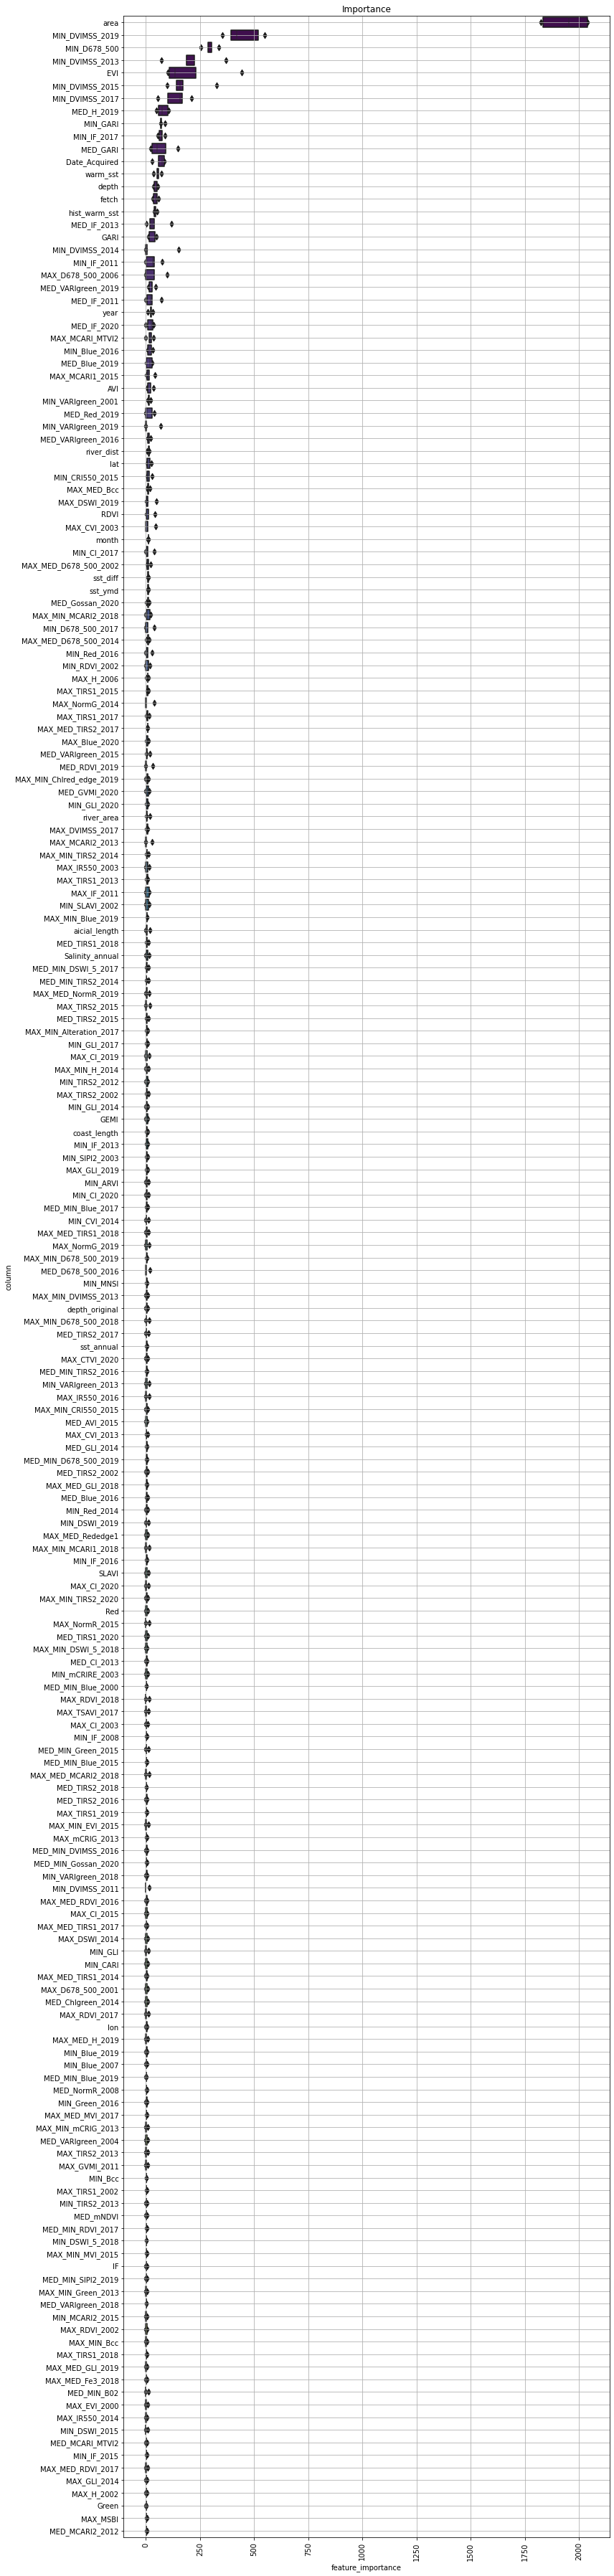

In [ ]:
visualise_df = train[float_columns].drop(columns = "cover")
_ = visualize_importance(getdata1, visualise_df, 'lgb_model')

In [ ]:
data_type = test.dtypes
float_columns = list(data_type[(data_type == int) | (data_type == float)].index)

submission_pred_df = test[float_columns].fillna(0)

In [ ]:
(test[float_columns].isnull().sum() / len(test[float_columns])).sort_values(ascending = False)

MED_Fe3_2011          0.617975
MED_SLAVI_2011        0.617975
MED_VARIgreen_2011    0.617975
MIN_Blue_2011         0.617975
MIN_Green_2011        0.617975
                        ...   
MED_Blue_2015         0.000000
MED_Green_2015        0.000000
MED_Red_2015          0.000000
MED_NIR_2015          0.000000
MIN_VARIgreen_2020    0.000000
Length: 3459, dtype: float64

In [ ]:
submission_pred_df

,lat,lon,area,year,month,depth_original,cliff_length,aicial_length,beach_length,coast_length,...,MIN_NLI_2020,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020
0,24.352222,124.202674,20.0,2002.0,12.0,0.5,0.000000,725.621704,306.701050,1032.322754,...,0.829623,0.409346,0.323023,-0.066356,-0.560810,-3.203797,4.297234,926.905329,1.669992,0.194766
1,24.420028,124.078583,20.0,2010.0,7.0,0.0,0.000000,0.000000,1421.016357,1421.016357,...,0.247503,0.540733,0.275585,-0.291240,-0.824888,-2.222276,2.263106,57.661693,4.274851,-79.273275
2,26.494197,127.836013,100.0,2004.0,2.0,13.8,73.183418,80.595177,984.422791,1138.201416,...,0.169334,0.601792,0.252251,-0.318454,-0.861477,-2.060505,2.099250,42.672829,5.655713,-2.061417
3,26.183639,127.319361,20.0,2010.0,8.0,0.0,0.000000,0.000000,29.648212,29.648212,...,0.089274,0.484109,0.270476,-0.320391,-0.863338,-2.708627,-10.433323,45.061952,1.546086,-14.527890
4,24.761089,125.269009,20.0,2019.0,10.0,-0.5,0.000000,34.796036,372.873108,407.669128,...,0.167518,0.440959,0.314171,-0.231658,-0.824787,-5.249625,2.563503,80.374689,1.827876,-6.335208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,26.702075,127.873347,20.0,2019.0,9.0,0.4,0.000000,20.594961,581.052856,601.647827,...,0.047139,0.503388,0.260930,-0.187582,-0.861148,-3.207146,3.633575,60.936945,3.053976,-28.354402
4035,24.337028,124.232694,20.0,2010.0,11.0,0.0,0.000000,0.000000,64.563194,64.563194,...,0.255338,0.520536,0.286240,-0.264021,-0.833596,-2.385447,2.495430,75.231230,3.946128,-2.112646
4036,26.493121,127.839918,100.0,2004.0,2.0,0.1,76.439651,133.127228,1403.852905,1613.419800,...,-0.082888,0.543260,0.316359,-0.123194,-0.843974,-4.397375,4.403977,117.513676,1.904304,0.601280
4037,24.068778,123.804194,20.0,2011.0,4.0,0.0,73.660492,0.000000,685.145386,758.805908,...,0.458417,0.415094,0.302570,-0.276085,-0.788681,-3.821984,2.203933,121.654726,2.282056,-2.029225


In [ ]:
test_pred_df

,lat,lon,area,year,month,depth_original,cliff_length,aicial_length,beach_length,coast_length,...,MED_MIN_NLI_2020,MED_MIN_NormG_2020,MED_MIN_NormR_2020,MED_MIN_PPR_2020,MED_MIN_PSNDc2_2020,MED_MIN_RDVI_2020,MED_MIN_IF_2020,MED_MIN_SLAVI_2020,MED_MIN_SIPI2_2020,MED_MIN_VARIgreen_2020
0,24.989139,125.243167,20.0,2011.0,9.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.028530,0.079698,0.013258,0.014837,0.007819,0.191098,0.014424,2.394996,1.017113,0.617362
1,26.996172,127.912024,40.0,2009.0,7.0,0.0,0.000000,0.478772,949.173828,949.652588,...,0.661970,0.056522,0.033613,0.043221,0.592775,3.845571,2.457853,1754.996325,1.875878,0.136660
2,26.363556,127.735139,20.0,2009.0,10.0,0.0,0.000000,180.985031,521.317383,702.302429,...,0.280919,0.031515,0.014230,0.017653,0.042444,0.485804,0.105650,71.603991,0.412928,47.856809
3,26.991255,127.912302,40.0,2009.0,1.0,0.0,0.000000,0.361444,799.384399,799.745850,...,0.104530,0.025201,0.002382,0.015179,0.005256,0.236457,0.163365,32.149861,0.146493,2.914683
4,26.988254,127.917254,40.0,2009.0,1.0,0.0,0.000000,6.062498,954.537293,960.599793,...,0.056274,0.030034,0.005580,0.020666,0.001515,0.201080,0.178190,21.664274,0.435676,0.349072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14135,24.728611,125.403889,20.0,2011.0,9.0,0.0,1294.458862,0.000000,56.749870,1351.208740,...,0.163995,0.056986,0.022932,0.045736,0.212690,0.856868,0.211131,239.288287,505.658099,448.982847
14136,27.002425,127.927444,40.0,2009.0,7.0,0.0,0.000000,88.078857,798.082642,886.161499,...,0.026653,0.053314,0.016329,0.035582,0.009981,0.642828,0.785417,37.686423,0.951218,21.837615
14137,24.797444,125.162417,20.0,2012.0,2.0,0.0,0.000000,0.000000,594.742188,594.742188,...,0.080454,0.018370,0.023739,0.014478,0.010071,0.340180,0.280696,9.570730,0.585393,14.021299
14138,26.999893,127.922014,40.0,2009.0,4.0,0.0,0.000000,53.709103,1355.455078,1409.164185,...,0.177383,0.025323,0.005451,0.012441,0.144152,0.336801,94.109319,2722.241411,0.020396,0.077696


In [ ]:
submission_pred = []
total_pred = []

for model in getdata1:
    pred = model.predict(submission_pred_df[["area","lon"]], num_iteration = model.best_iteration)
    total_pred.append(pred)

total_sum1 = np.sum(total_pred, axis=0)/len(getdata1)
# total_pred = []


# for model in getdata2:
#     pred = model.predict(submission_pred_df, num_iteration = model.best_iteration)
#     total_pred.append(pred)

# total_sum2 = np.sum(total_pred, axis=0)/len(getdata1)
# total_pred = []

# for model in getdata3:
#     pred = model.predict(submission_pred_df, num_iteration = model.best_iteration)
#     total_pred.append(pred)

# total_sum3 = np.sum(total_pred, axis=0)/len(getdata1)
# total_pred = []

# for model in getdata4:
#     pred = model.predict(submission_pred_df, num_iteration = model.best_iteration)
#     total_pred.append(pred)

# total_sum4 = np.sum(total_pred, axis=0)/len(getdata1)
# total_pred = []

# for model in getdata5:
#     pred = model.predict(submission_pred_df, num_iteration = model.best_iteration)
#     total_pred.append(pred)

# total_sum5 = np.sum(total_pred, axis=0)/len(getdata1)
# submit_sum = (total_sum1 + total_sum2 + total_sum3 + total_sum4 + total_sum5)/5

In [ ]:
pred

array([0.088936 , 0.088936 , 0.1034061, ..., 0.1034061, 0.088936 ,
       0.088936 ])

In [ ]:
submit.iloc[:, 1] = total_sum1
submit

,0,1
0,0,0.084001
1,1,0.084001
2,2,0.109970
3,3,0.084001
4,4,0.084001
...,...,...
4034,4034,0.084001
4035,4035,0.084001
4036,4036,0.109970
4037,4037,0.084093


In [ ]:
submit.iloc[:, 1] = total_sum1
submit

,0,1
0,0,0.084001
1,1,0.084001
2,2,0.109970
3,3,0.084001
4,4,0.084001
...,...,...
4034,4034,0.084001
4035,4035,0.084001
4036,4036,0.109970
4037,4037,0.084093


In [ ]:
submit = submit.apply(lambda x: round(x / 0.025) * 0.025)
submit

,0,1
0,0.0,0.075
1,1.0,0.075
2,2.0,0.100
3,3.0,0.075
4,4.0,0.075
...,...,...
4034,4034.0,0.075
4035,4035.0,0.075
4036,4036.0,0.100
4037,4037.0,0.075


In [ ]:
from google.colab import drive, files
submit.to_csv(os.path.join(Submission, 'submit_015.csv'),index=False,header=None)
files.download(os.path.join(Submission, 'submit_015.csv'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>